In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [6]:

# ================================
# 1. Carregar dados reais e gerados
# ================================
df_all = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_all.csv")
df_generated = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_generated.csv")

# Filtrar apenas os dados reais para treino da DNN
df_real = df_all[df_all["source"] == "real"].copy()

X_real = df_real.iloc[:, :10].values.astype(np.float32)  # RSSI
y_real = df_real[['X', 'Y']].values.astype(np.float32)   # Coordenadas


In [7]:

# ================================
# 2. Treinar rede DNN para regressão (RSSI → coord)
# ================================
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

model_dnn = Sequential([
    Dense(30, activation='relu', input_shape=(10,)),
    Dense(20, activation='relu'),
    Dense(2)  # saída (x, y)
])

model_dnn.compile(optimizer=Adam(0.01), loss='mse')
model_dnn.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=200, batch_size=50, verbose=0)


/home/darkcover/.cache/pypoetry/virtualenvs/gan-oPyfrVEv-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-18 17:45:12.727121: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:

# ================================
# 3. Aplicar pseudo-label em dados gerados
# ================================
X_generated = df_generated.iloc[:, :10].values.astype(np.float32)
pseudo_coords = model_dnn.predict(X_generated, verbose=1)
df_generated[['X', 'Y']] = pseudo_coords


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [9]:

# ================================
# 4. Selecionar as primeiras 1000 amostras para Figura 4
# ================================
sample_1000 = df_generated.iloc[:1000]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


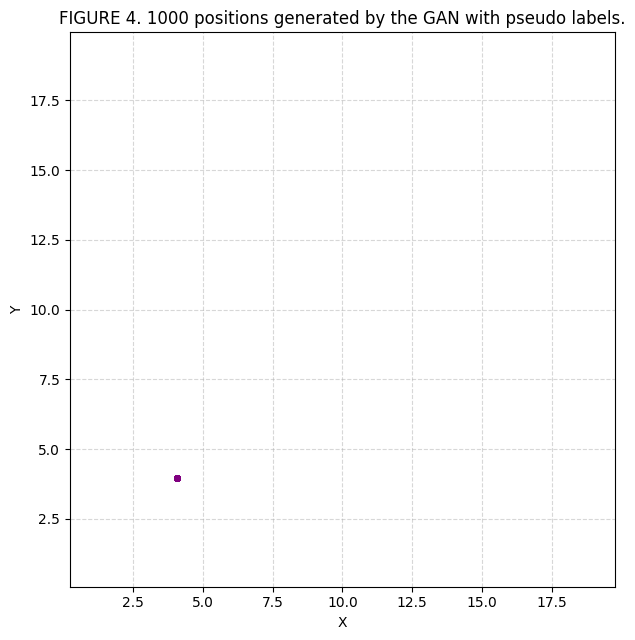

In [10]:

# ================================
# 5. Plotar Figura 4
# ================================
plt.figure(figsize=(6.5, 6.5))
plt.scatter(sample_1000['X'], sample_1000['Y'],
            c='purple', alpha=0.6, s=15, label='Pseudo-labeled positions')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("FIGURE 4. 1000 positions generated by the GAN with pseudo labels.")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()
